In [1]:
import corner
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from tqdm import tqdm_notebook
from collections import OrderedDict
# from mosfit.plotting import bandcolorf

from astropy.time import Time
from datetime import datetime

from matplotlib.ticker import MultipleLocator, StrMethodFormatter
import glob

snname = 'SN2019vxm'
sns.reset_orig()

%matplotlib widget

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# plt.rc('font', size=21)
# plt.rc('xtick', labelsize=21)
# plt.rc('ytick', labelsize=21)

fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
fig_width_full = text_width_pt*inches_per_pt*1.5  # 17
fig_height =fig_width*golden_mean # height in inches
fig_size = [fig_width,fig_height] #(9,5.5) #(9, 4.5)
fig_height_full = fig_width_full*golden_mean

fig_size_full = [fig_width_full,fig_height_full] #(9,5.5) #(9, 4.5)

In [3]:
def flux_to_mag(flux, zp):
    return -2.5 * np.log10(flux) + zp

def flux_to_mag_err(flux, d_flux, zp, d_zp):
    term1 = d_zp**2
    term2 = ( 2.5/(np.log(10)) * (d_flux / flux) )**2
    return np.sqrt(term1 + term2)

def yyyymmdd_to_mjd_adv(date_string):
    # Adjust the format to match the input, including time and 'Z' (UTC)
    date = datetime.strptime(date_string, '%Y%m%dT%H:%M:%SZ')
    time = Time(date, format='datetime', scale='utc')

    mjd = time.mjd
    return mjd

tess_binned_18 = np.load('../Data/tess_binned_lc_18.npy')
tess_zp_df = pd.read_csv('../Data/tess_zp.csv')

tess_zp = tess_zp_df[(tess_zp_df['Sector'] == 18) & (tess_zp_df['Method'] == 'psf')]

In [4]:
df = pd.read_csv('../Data/vxm_collated_data.csv')

df['Filter'] = df['Filter'].str.replace(' ', '')

unique_combinations = df[['Observatory', 'Filter']].drop_duplicates()

unique_combinations = unique_combinations.reset_index(drop=True)

unique_combinations['Colour'] = None
unique_combinations['Edgecolour'] = 'grey'
unique_combinations['Markersize'] = None
unique_combinations['Linewidth'] = 0.8
unique_combinations['Marker'] = None
unique_combinations['Label'] = None
unique_combinations['b/r'] = None

unique_filters = pd.DataFrame(columns = ['Filter', 'Colour', 'Label', 'b/r'])

unique_filters['Filter'] = np.array(unique_combinations['Filter'].drop_duplicates().reset_index(drop=True).values, dtype = str)
unique_filters['Colour'] = ['darkorange', 'cyan', 'red', 'darkred', 'green', 'rebeccapurple', 'C1', 'steelblue', 
                            'mediumseagreen', 'rebeccapurple', 'magenta', 'darkblue', 'purple', 'darkgreen']
unique_filters['Label'] = '$' + unique_filters['Filter'] + '$'
unique_filters['b/r'] = ['r', 'b', 'r', 'r', 'b', 'b', 'r', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

unique_observatory = pd.DataFrame(columns = ['Observatory', 'Marker', 'Markersize', 'Label'])

unique_observatory['Observatory'] = np.array(unique_combinations['Observatory'].drop_duplicates().reset_index(drop=True).values, dtype = str)
unique_observatory['Marker'] = ['p', 'v', 'h', 'X', 'P', 's', 'd']
unique_observatory['Markersize'] = [90, 60, 55, 70, 60, 42, 90]
unique_observatory['Label'] = unique_observatory['Observatory']
unique_observatory['Label'][unique_observatory['Observatory'] == 'Siding Springs'] = 'Sinistro'

# unique_observatory['Label'][unique_observatory['Label'] == 'TESS'] = '$TESS$'
unique_observatory['Label'][unique_observatory['Label'] == 'Gaia'] = '$Gaia$'
unique_observatory['Label'][unique_observatory['Label'] == 'Swift'] = '$Swift$'

for i in range(len(unique_combinations)):
    unique_combinations['Colour'][i] = unique_filters['Colour'][unique_filters['Filter'] == unique_combinations['Filter'][i]].values[0]
    unique_combinations['Label'][i] = unique_observatory['Label'][unique_observatory['Observatory'] == unique_combinations['Observatory'][i]].values[0] + '-' + unique_filters['Label'][unique_filters['Filter'] == unique_combinations['Filter'][i]].values[0]
    unique_combinations['Marker'][i] = unique_observatory['Marker'][unique_observatory['Observatory'] == unique_combinations['Observatory'][i]].values[0]
    unique_combinations['Markersize'][i] = unique_observatory['Markersize'][unique_observatory['Observatory'] == unique_combinations['Observatory'][i]].values[0]
    unique_combinations['b/r'][i] = unique_filters['b/r'][unique_filters['Filter'] == unique_combinations['Filter'][i]].values[0]

unique_combinations['Alpha'] = 1
# unique_combinations['Alpha'][unique_combinations['Observatory'] == 'ATLAS'] = 0.6
# unique_combinations['Alpha'][unique_combinations['Observatory'] == 'ATLAS'] = 0.6

unique_combinations.loc[len(unique_combinations)] = ['TESS', 'R', 'k', 'k', 75, 0.8, '.', '$TESS$-$R$', 'r', 1]

unique_combinations

/var/folders/6v/pg_c9mqn3gn45gn_zmvy9w9cvfsx9j/T/ipykernel_35553/1042673113.py:31: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  unique_observatory['Label'][unique_observatory['Observatory'] == 'Siding Springs'] = 'Sinistro'
/var/folders/6v/

Observatory Filter          Colour Edgecolour Markersize  Linewidth  \
0            ATLAS      o      darkorange       grey         90        0.8   
1            ATLAS      c            cyan       grey         90        0.8   
2              PS1      i             red       grey         60        0.8   
3              PS1      z         darkred       grey         60        0.8   
4   Siding Springs      g           green       grey         55        0.8   
5   Siding Springs      u   rebeccapurple       grey         55        0.8   
6   Siding Springs      r              C1       grey         55        0.8   
7   Siding Springs      i             red       grey         55        0.8   
8              ZTF      g           green       grey         70        0.8   
9              ZTF      r              C1       grey         70        0.8   
10             ZTF      i             red       grey         70        0.8   
11           Swift      B       steelblue       grey         60        0.8   
12           Swift      V  mediumseagreen       grey         60        0.8   
13           Swift      U   rebeccapurple       grey         60        0.8   
14           Swift   UVW1         magenta       grey         60        0.8   
15           Swift   UVW2        darkblue       grey         60        0.8   
16           Swift   UVM2          purple       grey         60        0.8   
17            Gaia      G       darkgreen       grey         42        0.8   
18         Konkoly      B       steelblue       grey         90        0.8   
19         Konkoly      V  mediumseagreen       grey         90        0.8   
20         Konkoly      g           green       grey         90        0.8   
21         Konkoly      r              C1       grey         90        0.8   
22         Konkoly      i             red       grey         90        0.8   
23         Konkoly      z         darkred       grey         90        0.8   
24            TESS      R               k          k         75        0.8   

   Marker           Label b/r  Alpha  
0       p       ATLAS-$o$   r      1  
1       p       ATLAS-$c$   b      1  
2       v         PS1-$i$   r      1  
3       v         PS1-$z$   r      1  
4       h    Sinistro-$g$   b      1  
5       h    Sinistro-$u$   b      1  
6       h    Sinistro-$r$   r      1  
7       h    Sinistro-$i$   r      1  
8       X         ZTF-$g$   b      1  
9       X         ZTF-$r$   r      1  
10      X         ZTF-$i$   r      1  
11      P     $Swift$-$B$   b      1  
12      P     $Swift$-$V$   b      1  
13      P     $Swift$-$U$   b      1  
14      P  $Swift$-$UVW1$   b      1  
15      P  $Swift$-$UVW2$   b      1  
16      P  $Swift$-$UVM2$   b      1  
17      s      $Gaia$-$G$   b      1  
18      d     Konkoly-$B$   b      1  
19      d     Konkoly-$V$   b      1  
20      d     Konkoly-$g$   b      1  
21      d     Konkoly-$r$   r      1  
22      d     Konkoly-$i$   r      1  
23      d     Konkoly-$z$   r      1  
24      .      $TESS$-$R$   r      1

In [5]:
file = '/Users/zgl12/Modules/SN2019vxm/Modelling/SN2019vxm_2fb9273eadba33fd_21d5a3bfd93dbaab_withswiftb.json'

with open(file, 'r', encoding = 'utf-8') as f:
    data = json.loads(f.read())
    
    if 'name' not in data:
        data = data[list(data.keys())[0]]

In [6]:
data

{'name': 'SN2019vxm',
 'sources': [{'bibcode': '1994ApJ...422..158O', 'alias': '1'},
  {'bibcode': '2012ApJ...746..121C', 'alias': '2'},
  {'bibcode': '1994AJ....107.2108R', 'alias': '3'},
  {'bibcode': '2013ApJ...773...76C', 'alias': '4'},
  {'bibcode': '2017arXiv171002145G', 'alias': '5'},
  {'bibcode': '2017arXiv170600825N', 'alias': '6'},
  {'bibcode': '1983ApJ...270..119M', 'alias': '7'}],
 'alias': [{'value': 'SN2019vxm', 'source': '1'}],
 'models': [{'code': 'MOSFiT',
   'date': '2025/10/14',
   'name': 'csm',
   'realizations': [{'alias': '1',
     'parameters': {'avhost': {'value': 3.7947262174025194e-05},
      'codeltalambda': {'latex': 'l_\\lambda', 'log': True, 'value': -1.0},
      'codeltatime': {'latex': 'l_t', 'log': True, 'value': -1.0},
      'default_no_error_bar_error': {'latex': 'default_no_error_bar_error',
       'log': False,
       'value': 0.0},
      'default_upper_limit_error': {'latex': 'default_upper_limit_error',
       'log': False,
       'value': 0.1}

In [7]:
photo = data['photometry']
model = data['models'][0]
snname = data['name']

band_attr = ['band', 'instrument', 'telescope', 'system', 'bandset']
band_list = list(set([tuple(x.get(y, '')
                            for y in band_attr) for x in photo
                            if 'band' in x and 'magnitude' in x]))

In [8]:
band_list

[('UVW1', 'geckocam', 'Swift', 'AB', ''),
 ('g', 'geckocam', 'Siding Springs', 'AB', ''),
 ('R', 'geckocam', 'TESS', 'AB', ''),
 ('r', 'geckocam', 'Konkoly', 'AB', ''),
 ('U', 'geckocam', 'Swift', 'AB', ''),
 ('i', 'geckocam', 'Siding Springs', 'AB', ''),
 ('r', 'geckocam', 'Siding Springs', 'AB', ''),
 ('cyan', 'geckocam', 'ATLAS', 'AB', ''),
 ('u', 'geckocam', 'Siding Springs', 'AB', ''),
 ('g', 'geckocam', 'Konkoly', 'AB', ''),
 ('UVW2', 'geckocam', 'Swift', 'AB', ''),
 ('z', 'geckocam', 'Konkoly', 'AB', ''),
 ('orange', 'geckocam', 'ATLAS', 'AB', ''),
 ('V', 'geckocam', 'Konkoly', 'AB', ''),
 ('B', 'geckocam', 'Swift', 'AB', ''),
 ('UVM2', 'geckocam', 'Swift', 'AB', ''),
 ('V', 'geckocam', 'Swift', 'AB', ''),
 ('i', 'geckocam', 'Konkoly', 'AB', ''),
 ('G', 'geckocam', 'Gaia', 'AB', '')]

In [9]:
json_df = pd.DataFrame(photo)

json_df['telescope'].unique()

array(['Swift', 'Gaia', 'TESS', 'Konkoly', 'ATLAS', 'Siding Springs'],
      dtype=object)

In [10]:
json_df

time band          e_magnitude instrument  \
0        58804.625973057    B  0.13739511153005085   geckocam   
1        58804.625973057    B  0.13726981077972256   geckocam   
2        58804.625973057    B  0.14537701708365153   geckocam   
3        58804.625973057    B   0.1481836198696839   geckocam   
4        58804.625973057    B  0.12314137103371708   geckocam   
...                  ...  ...                  ...        ...   
3716182     59002.519002    z  0.11805417112475132   geckocam   
3716183     59002.519002    z  0.13461272741855537   geckocam   
3716184     59002.519002    z  0.11513968495285413   geckocam   
3716185     59002.519002    z  0.11473732598904861   geckocam   
3716186     59002.519002    z   0.1408687478621156   geckocam   

                  magnitude realization system telescope u_time model source  
0        19.218399852584955        1213     AB     Swift    MJD     1      1  
1        19.230993575171293         840     AB     Swift    MJD     1      1  
2        19.241253773957308        1163     AB     Swift    MJD     1      1  
3        19.272707096265247        3206     AB     Swift    MJD     1      1  
4         19.28339360225726        8229     AB     Swift    MJD     1      1  
...                     ...         ...    ...       ...    ...   ...    ...  
3716182   15.65487156067352       11452     AB   Konkoly    MJD     1      1  
3716183  15.655792533969581        1624     AB   Konkoly    MJD     1      1  
3716184  15.656519294793725        3063     AB   Konkoly    MJD     1      1  
3716185  15.663582874649666        8513     AB   Konkoly    MJD     1      1  
3716186  15.690673603313012        2307     AB   Konkoly    MJD     1      1  

[3716187 rows x 11 columns]

In [11]:
from astropy.cosmology import FlatLambdaCDM

lcdm = FlatLambdaCDM(H0=70, Om0=0.3)
z = 0.019

d_L = lcdm.luminosity_distance(z).value

mu = 5 * np.log10(d_L) + 25

numerator = (1+z)**2 - 1
denominator = 1 + (1+z)**2

beta = numerator/denominator

time_change = np.sqrt(1-beta**2)

In [12]:
# unique_telescopes = unique_combinations['Observatory'].unique()

# # mosfit_df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/mosfit_collated_vxm_data_with_tess.csv')
# mosfit_df = pd.read_csv('../Data/collated_vxm_data_with_tess.csv')
# mosfit_df['Filter'] = mosfit_df['Filter'].str.replace(' ', '')

# # unique_telescopes = ['ATLAS']

# fig, axs = plt.subplots(1, 1, figsize = (fig_width_full, fig_height_full))

# peak = 58804.03

# print((yyyymmdd_to_mjd_adv('20191117T00:08:28Z') - peak) / 60)
# peak_space = np.linspace(peak - 0.3, peak + 0.3, 101)

# axs.axvline(peak, color = 'magenta', linestyle = '-', alpha = 1, linewidth = 2.2, label = 'Explosion time')
# axs.axvline(yyyymmdd_to_mjd_adv('20191117T00:08:28Z'), color = 'b', linestyle = ':', alpha = 1, linewidth = 2, label = r'GBM Trigger')

# plotted_labels = set()

# indices = np.where((tess_binned_18[0] > 58804.03) & (tess_binned_18[0] < 59500) & 
#                    (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) > 0) & 
#                    (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) < 20))[0]

# null_indices = np.where((tess_binned_18[0] < 58804.03) & 
#                         (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) > 0) & 
#                         (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) < 26))[0]

# axs.scatter(tess_binned_18[0][null_indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[null_indices], 
#             marker=r'$\downarrow$', color='k', s = 200, zorder = 0)

# axs.scatter(tess_binned_18[0][indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[indices], 
#             marker='.', color='k', label=r'\textit{TESS}-$R$', s = 75, zorder = 10)

# axs.errorbar(tess_binned_18[0][indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[indices], 
#              yerr=flux_to_mag_err(tess_binned_18[1], tess_binned_18[2], 20.576474800725272, tess_zp['d_ZP'].values[0])[indices],
#              fmt='.', color='k')

# for temp_telescope in unique_telescopes:

#     temp_telescope_df = json_df[json_df['telescope'] == temp_telescope]
#     temp_combinations = unique_combinations[unique_combinations['Observatory'] == temp_telescope]
    
#     band_list = temp_combinations['Filter'].unique()

#     for band in band_list:
        
#         if temp_telescope == 'ATLAS':
#             if band == 'o':
#                 sec_band = 'o'
#                 band = 'orange'
#             elif band == 'c':
#                 sec_band = 'c'
#                 band = 'cyan'
#             else:
#                 print('BAND', temp_telescope, band)
#                 continue
            
#         else:
#             sec_band = band

#         temp_df = temp_telescope_df[temp_telescope_df['band'] == band].copy()
#         temp_df['time'] = pd.to_numeric(temp_df['time'], errors='coerce')
#         temp_df['magnitude'] = pd.to_numeric(temp_df['magnitude'], errors='coerce')
#         temp_df['e_magnitude'] = pd.to_numeric(temp_df['e_magnitude'], errors='coerce')

#         if temp_df.empty:
#             temp_mosfit_df = mosfit_df[(mosfit_df['Observatory'] == temp_telescope) & (mosfit_df['Filter'] == sec_band)]
        
#             mag = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                 (mosfit_df['Filter'] == sec_band) & 
#                                 (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
            
#             mjd = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                 (mosfit_df['Filter'] == sec_band) & 
#                                 (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
            
#             d_mag = mosfit_df['d_Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                     (mosfit_df['Filter'] == sec_band) & 
#                                     (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
            
#             mag_null = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                         (mosfit_df['Filter'] == sec_band) & 
#                                         (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
            
#             mjd_null = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                         (mosfit_df['Filter'] == sec_band) & 
#                                         (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
        
#             if sec_band == 'r':
#                 mag_add =  - 1
#                 add = "- 1.0"
#             elif sec_band == 'i':
#                 mag_add = -1.7
#                 add = "- 1.7"
#             elif sec_band == 'z':
#                 mag_add = -2.1
#                 add = "- 2.1"
#             elif sec_band == 'orange' or sec_band == 'o':
#                 mag_add = -0.4
#                 add = "- 0.4"
#             elif sec_band == 'cyan' or sec_band == 'c':
#                 mag_add = 0.2
#                 add = "+ 0.2"
#             elif sec_band == 'V':
#                 mag_add = 1
#                 add = "+ 1.0"
#             elif sec_band == 'G':
#                 mag_add = 1.7
#                 add = "+ 1.7"
#             elif sec_band == 'g':
#                 mag_add = 2.0
#                 add = "+ 2.0"
#             elif sec_band == 'B':
#                 mag_add = 2.5
#                 add = "+ 2.5"
#             elif sec_band == 'u':
#                 mag_add = 3.3
#                 add = "+ 3.3"
#             elif 'U' in sec_band:
#                 mag_add = 3.6
#                 add = "+ 3.6"
#             # elif 'UVW1' in unique_combinations['Filter'][i]:
#             #     mag += 3.8
#             #     add = "+3.8"
#             else:
#                 print("No mag offset for", sec_band)
#                 mag_add = 0
#                 add = ''

#             axs.errorbar(mjd, mag + mag_add, 
#                         yerr=d_mag, alpha=alpha, 
#                         fmt='.', color=colour)

#             axs.scatter(mjd, mag + mag_add, 
#                         edgecolor=edgecolour, color = colour, s=markersize, 
#                         linewidth=linewidth, marker=marker, zorder=20, alpha=alpha, label=label + ' ' + add)
            
#             axs.scatter(mjd_null, mag_null,
#                     color = unique_combinations['Colour'][i], 
#                     s = 200,
#                     linewidth = unique_combinations['Linewidth'][i],
#                     marker = r"$\downarrow$", 
#                     zorder = 20)

#             stats = temp_df.groupby('time')['magnitude'].agg([('median', 'median'), 
#                                                             ('p16', lambda x: np.nanpercentile(x, 5)),
#                                                             ('p84', lambda x: np.nanpercentile(x, 95))]).reset_index()

#             axs.plot(stats['time'], stats['median'] + mag_add, linewidth=1.5, alpha=0.6, color=colour)
#             axs.fill_between(stats['time'], stats['p16'] + mag_add, stats['p84'] + mag_add, alpha=0.3, color=colour)

#         mask = pd.notna(temp_df['realization'])
        
#         temp_unique = unique_combinations[(unique_combinations['Observatory'] == temp_telescope) & 
#                                           (unique_combinations['Filter'] == sec_band)]

#         if temp_unique.empty:
#             print("Skipping", temp_telescope, sec_band)
#             continue

#         colour = temp_unique['Colour'].values[0]
#         edgecolour = temp_unique['Edgecolour'].values[0]
#         markersize = temp_unique['Markersize'].values[0]
#         linewidth = temp_unique['Linewidth'].values[0]
#         label = temp_unique['Label'].values[0]
#         marker = temp_unique['Marker'].values[0]
#         alpha = temp_unique['Alpha'].values[0]

#         add_label = label not in plotted_labels
#         if add_label:
#             plotted_labels.add(label)
#         else:
#             label = None
            
#         temp_mosfit_df = mosfit_df[(mosfit_df['Observatory'] == temp_telescope) & (mosfit_df['Filter'] == sec_band)]
        
        
#         mag = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                (mosfit_df['Filter'] == sec_band) & 
#                                (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
#         mjd = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                (mosfit_df['Filter'] == sec_band) & 
#                                (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
#         d_mag = mosfit_df['d_Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                    (mosfit_df['Filter'] == sec_band) & 
#                                    (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
#         mag_null = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                     (mosfit_df['Filter'] == sec_band) & 
#                                     (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
        
#         mjd_null = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
#                                     (mosfit_df['Filter'] == sec_band) & 
#                                     (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
    
#         if sec_band == 'r':
#             mag_add =  - 1
#             add = "- 1.0"
#         elif sec_band == 'i':
#             mag_add = -1.7
#             add = "- 1.7"
#         elif sec_band == 'z':
#             mag_add = -2.1
#             add = "- 2.1"
#         elif sec_band == 'orange' or sec_band == 'o':
#             mag_add = -0.4
#             add = "- 0.4"
#         elif sec_band == 'cyan' or sec_band == 'c':
#             mag_add = 0.2
#             add = "+ 0.2"
#         elif sec_band == 'V':
#             mag_add = 1
#             add = "+ 1.0"
#         elif sec_band == 'G':
#             mag_add = 1.7
#             add = "+ 1.7"
#         elif sec_band == 'g':
#             mag_add = 2.0
#             add = "+ 2.0"
#         elif sec_band == 'B':
#             mag_add = 2.5
#             add = "+ 2.5"
#         elif sec_band == 'u':
#             mag_add = 3.3
#             add = "+ 3.3"
#         elif 'U' in sec_band:
#             mag_add = 3.6
#             add = "+ 3.6"
#         # elif 'UVW1' in unique_combinations['Filter'][i]:
#         #     mag += 3.8
#         #     add = "+3.8"
#         else:
#             print("No mag offset for", sec_band)
#             mag_add = 0
#             add = ''
            
#         if band != 'TESS':

#             axs.errorbar(mjd, mag + mag_add, 
#                         yerr=d_mag, alpha=alpha, 
#                         fmt='.', color=colour)

#             axs.scatter(mjd, mag + mag_add, 
#                         edgecolor=edgecolour, color = colour, s=markersize, 
#                         linewidth=linewidth, marker=marker, zorder=20, alpha=alpha, label=label + ' ' + add)
            
#             axs.scatter(mjd_null, mag_null,
#                     color = unique_combinations['Colour'][i], 
#                     s = 200,
#                     linewidth = unique_combinations['Linewidth'][i],
#                     marker = r"$\downarrow$", 
#                     zorder = 20)
        
#         if temp_df.empty:
#             continue
#         else:
#             stats = temp_df.groupby('time')['magnitude'].agg([('median', 'median'), 
#                                                             ('p16', lambda x: np.nanpercentile(x, 5)),
#                                                             ('p84', lambda x: np.nanpercentile(x, 95))]).reset_index()
#             stats = stats.dropna(subset=['median', 'p16', 'p84'])
            
            
#             if not stats.empty:

#                 axs.plot(stats['time'], stats['median'] + mag_add, linewidth=1.5, alpha=0.6, color=colour)
#                 axs.fill_between(stats['time'], stats['p16'] + mag_add, stats['p84'] + mag_add, alpha=0.3, color=colour)

# axs.set_xlim(58750, 59450)
# axs.set_ylim(12, 22.5)
# axs.invert_yaxis()

# axs.xaxis.set_minor_locator(MultipleLocator(50))
# axs.xaxis.set_major_locator(MultipleLocator(100))
# axs.yaxis.set_minor_locator(MultipleLocator(0.5))
# axs.yaxis.set_major_locator(MultipleLocator(1))

# axs1 = axs.twiny()

# axs1.set_xlim(time_change*(58750 - peak), time_change*(59450 - peak))
# axs1.set_xlabel(r'Rest-frame days since rise$\;({\rm d})$')

# axs1.xaxis.set_minor_locator(MultipleLocator(50))
# axs1.xaxis.set_major_locator(MultipleLocator(100))

# axs.set_xlabel(r'${\rm Time}\;({\rm MJD})$')
# axs.set_ylabel(r'${\rm Apparent\;\,Magnitude}\;({\rm mag})$')

# axs2 = axs.twinx()
# axs2.set_ylim(12 - mu, 22.5 - mu)
# axs2.invert_yaxis()
# axs2.set_ylabel(r'${\rm Absolute\;\,Magnitude}\;({\rm mag})$')

# axs2.yaxis.set_minor_locator(MultipleLocator(0.5))
# axs2.yaxis.set_major_locator(MultipleLocator(1))

# axs.legend(ncol = 5, bbox_to_anchor=(1, 1.37), loc='upper right', frameon=False)
# # plt.savefig('../Plots/magnitude.pdf', format = 'pdf', bbox_inches = 'tight')
# plt.show()

-0.00040200617283214036


/var/folders/6v/pg_c9mqn3gn45gn_zmvy9w9cvfsx9j/T/ipykernel_35553/1308653235.py:2: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + zp
/var/folders/6v/pg_c9mqn3gn45gn_zmvy9w9cvfsx9j/T/ipykernel_35553/1308653235.py:2: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + zp


No mag offset for R


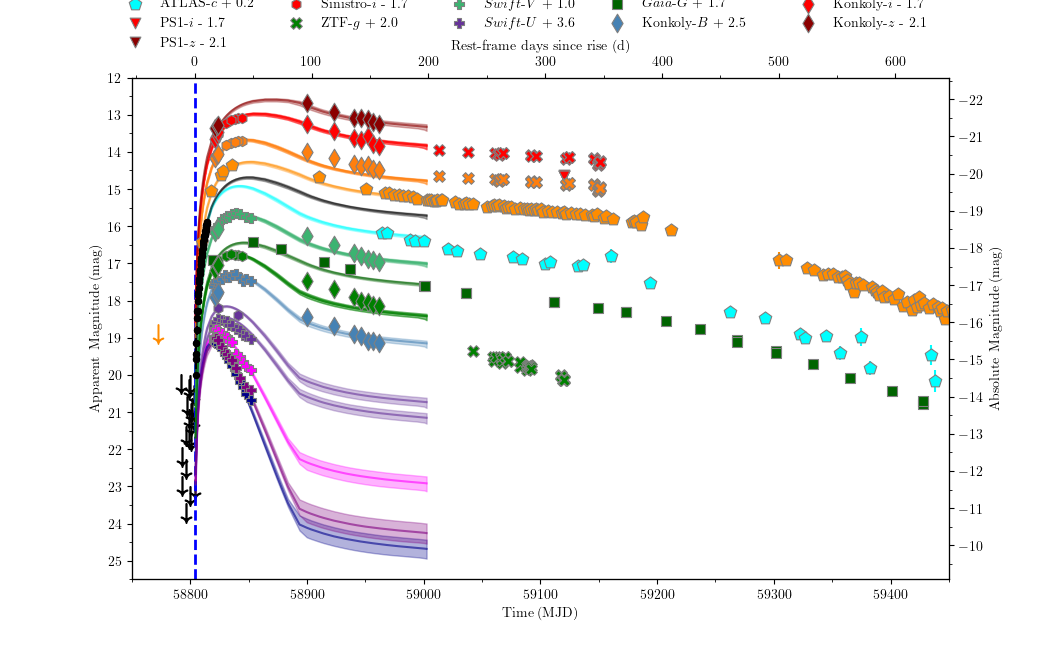

In [13]:
unique_telescopes = unique_combinations['Observatory'].unique()

mosfit_df = pd.read_csv('../Data/collated_vxm_data_with_tess.csv')
mosfit_df['Filter'] = mosfit_df['Filter'].str.replace(' ', '')

fig, axs = plt.subplots(1, 1, figsize = (fig_width_full, fig_height_full))

peak = 58804.03

print((yyyymmdd_to_mjd_adv('20191117T00:08:28Z') - peak) / 60)
peak_space = np.linspace(peak - 0.3, peak + 0.3, 101)

# axs.axvline(peak, color = 'magenta', linestyle = '--', alpha = 1, linewidth = 2.2, label = 'Explosion time')
axs.axvline(yyyymmdd_to_mjd_adv('20191117T00:08:28Z'), color = 'b', linestyle = '--', alpha = 1, linewidth = 2, label = r'GBM Trigger')

plotted_labels = set()

indices = np.where((tess_binned_18[0] > 58804.03) & (tess_binned_18[0] < 59500) & 
                   (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) > 0) & 
                   (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) < 20))[0]

null_indices = np.where((tess_binned_18[0] < 58804.03) & 
                        (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) > 0) & 
                        (flux_to_mag(tess_binned_18[1], tess_zp['ZP'].values[0]) < 26))[0]

axs.scatter(tess_binned_18[0][null_indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[null_indices], 
            marker=r'$\downarrow$', color='k', s = 200, zorder = 0)

axs.scatter(tess_binned_18[0][indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[indices], 
            marker='.', color='k', label=r'$TESS$-$R$', s = 75, zorder = 10)

axs.errorbar(tess_binned_18[0][indices], flux_to_mag(tess_binned_18[1], 20.576474800725272)[indices], 
             yerr=flux_to_mag_err(tess_binned_18[1], tess_binned_18[2], 20.576474800725272, tess_zp['d_ZP'].values[0])[indices],
             fmt='.', color='k')

plotted_labels.add(r'$TESS$-$R$')

for temp_telescope in unique_telescopes:

    temp_telescope_df = json_df[json_df['telescope'] == temp_telescope]
    temp_combinations = unique_combinations[unique_combinations['Observatory'] == temp_telescope]
    
    band_list = temp_combinations['Filter'].unique()

    for band in band_list:
        
        if temp_telescope == 'ATLAS':
            if band == 'o':
                sec_band = 'o'
                band = 'orange'
            elif band == 'c':
                sec_band = 'c'
                band = 'cyan'
            else:
                print('BAND', temp_telescope, band)
                continue
            
        else:
            sec_band = band

        temp_mosfit_df = mosfit_df[(mosfit_df['Observatory'] == temp_telescope) & (mosfit_df['Filter'] == sec_band)]
    
        mag = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
                            (mosfit_df['Filter'] == sec_band) & 
                            (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
        mjd = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
                            (mosfit_df['Filter'] == sec_band) & 
                            (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
        d_mag = mosfit_df['d_Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
                                (mosfit_df['Filter'] == sec_band) & 
                                (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 20) & (mosfit_df['MJD'] > 58804.08)]
        
        mag_null = mosfit_df['Mag'][(mosfit_df['Observatory'] == temp_telescope) & 
                                    (mosfit_df['Filter'] == sec_band) & 
                                    (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
        
        mjd_null = mosfit_df['MJD'][(mosfit_df['Observatory'] == temp_telescope) & 
                                    (mosfit_df['Filter'] == sec_band) & 
                                        (mosfit_df['Mag'] > 0) & (mosfit_df['Mag'] < 26) & (mosfit_df['MJD'] < 58804.08)]
        
        if sec_band == 'r':
            mag_add =  - 1
            add = " - 1.0"
        elif sec_band == 'i':
            mag_add = -1.7
            add = " - 1.7"
        elif sec_band == 'z':
            mag_add = -2.1
            add = " - 2.1"
        elif sec_band == 'orange' or sec_band == 'o':
            mag_add = -0.4
            add = " - 0.4"
        elif sec_band == 'cyan' or sec_band == 'c':
            mag_add = 0.2
            add = " + 0.2"
        elif sec_band == 'V':
            mag_add = 1
            add = " + 1.0"
        elif sec_band == 'G':
            mag_add = 1.7
            add = " + 1.7"
        elif sec_band == 'g':
            mag_add = 2.0
            add = " + 2.0"
        elif sec_band == 'B':
            mag_add = 2.5
            add = " + 2.5"
        elif sec_band == 'u':
            mag_add = 3.3
            add = " + 3.3"
        elif 'U' in sec_band:
            mag_add = 3.6
            add = " + 3.6"
        # elif 'UVW1' in unique_combinations['Filter'][i]:
        #     mag += 3.8
        #     add = "+3.8"
        else:
            print("No mag offset for", sec_band)
            mag_add = 0
            add = ''
            
        temp_unique = unique_combinations[(unique_combinations['Observatory'] == temp_telescope) & 
                                          (unique_combinations['Filter'] == sec_band)]

        if temp_unique.empty:
            print("Skipping", temp_telescope, sec_band)
            continue
            
        colour = temp_unique['Colour'].values[0]
        edgecolour = temp_unique['Edgecolour'].values[0]
        markersize = temp_unique['Markersize'].values[0]
        linewidth = temp_unique['Linewidth'].values[0]
        label = temp_unique['Label'].values[0]
        marker = temp_unique['Marker'].values[0]
        alpha = temp_unique['Alpha'].values[0]
        
        if band != 'TESS':
            
            if label not in plotted_labels:
                plotted_labels.add(label)
                plot_label = label + add
            else:
                plot_label = None

            axs.errorbar(mjd, mag + mag_add, 
                        yerr=d_mag, alpha=alpha, 
                        fmt='.', color=colour)

            axs.scatter(mjd, mag + mag_add, 
                        edgecolor=edgecolour, color = colour, s=markersize, 
                        linewidth=linewidth, marker=marker, zorder=20, alpha=alpha, label=plot_label)
            
            axs.scatter(mjd_null, mag_null, color = colour, s = 200,
                        linewidth = linewidth, marker = r"$\downarrow$", zorder = 20)
        
        temp_df = temp_telescope_df[temp_telescope_df['band'] == band].copy()
        temp_df['time'] = pd.to_numeric(temp_df['time'], errors='coerce')
        temp_df['magnitude'] = pd.to_numeric(temp_df['magnitude'], errors='coerce')
        temp_df['e_magnitude'] = pd.to_numeric(temp_df['e_magnitude'], errors='coerce')
        
        if temp_df.empty:
            continue
        else:
            stats = temp_df.groupby('time')['magnitude'].agg([('median', 'median'), 
                                                            ('p16', lambda x: np.nanpercentile(x, 5)),
                                                            ('p84', lambda x: np.nanpercentile(x, 95))]).reset_index()
            stats = stats.dropna(subset=['median', 'p16', 'p84'])
            
            if not stats.empty:

                axs.plot(stats['time'], stats['median'] + mag_add, linewidth=1.5, alpha=0.6, color=colour)
                axs.fill_between(stats['time'], stats['p16'] + mag_add, stats['p84'] + mag_add, alpha=0.3, color=colour)

axs.set_xlim(58750, 59450)
axs.set_ylim(12, 25.5)
axs.invert_yaxis()

axs.xaxis.set_minor_locator(MultipleLocator(50))
axs.xaxis.set_major_locator(MultipleLocator(100))
axs.yaxis.set_minor_locator(MultipleLocator(0.5))
axs.yaxis.set_major_locator(MultipleLocator(1))

axs1 = axs.twiny()

axs1.set_xlim(time_change*(58750 - peak), time_change*(59450 - peak))
axs1.set_xlabel(r'Rest-frame days since rise$\;({\rm d})$')

axs1.xaxis.set_minor_locator(MultipleLocator(50))
axs1.xaxis.set_major_locator(MultipleLocator(100))

axs.set_xlabel(r'${\rm Time}\;({\rm MJD})$')
axs.set_ylabel(r'${\rm Apparent\;\,Magnitude}\;({\rm mag})$')

axs2 = axs.twinx()
axs2.set_ylim(12 - mu, 25.5 - mu)
axs2.invert_yaxis()
axs2.set_ylabel(r'${\rm Absolute\;\,Magnitude}\;({\rm mag})$')

axs2.yaxis.set_minor_locator(MultipleLocator(0.5))
axs2.yaxis.set_major_locator(MultipleLocator(1))

axs.legend(ncol = 5, bbox_to_anchor=(1, 1.30), loc='upper right', frameon=False)
plt.savefig('../Plots/magnitude.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()

In [ ]:
# unique_telescopes = json_df['telescope'].unique()
# mosfit_df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/mosfit_collated_vxm_data_with_tess.csv')

# # unique_telescopes = ['ATLAS']

# plt.figure(figsize=fig_size_full)
# plt.gca().invert_yaxis()

# plotted_labels = set()

# for temp_telescope in unique_telescopes:

#     temp_telescope_df = json_df[json_df['telescope'] == temp_telescope]
#     band_list = temp_telescope_df['band'].unique()

#     for band in band_list:
        
#         if temp_telescope == 'ATLAS':
#             if band == 'orange':
#                 sec_band = 'o'
#             elif band == 'cyan':
#                 sec_band = 'c'
#             else:
#                 print('BAND', temp_telescope, band)
#                 continue
#         else:
#             sec_band = band

#         temp_df = temp_telescope_df[temp_telescope_df['band'] == band].copy()

#         if temp_df.empty:
#             continue

#         temp_df['time'] = pd.to_numeric(temp_df['time'], errors='coerce')
#         temp_df['magnitude'] = pd.to_numeric(temp_df['magnitude'], errors='coerce')
#         temp_df['e_magnitude'] = pd.to_numeric(temp_df['e_magnitude'], errors='coerce')

#         mask = pd.notna(temp_df['realization'])
        
#         temp_unique = unique_combinations[(unique_combinations['Observatory'] == temp_telescope) & 
#                                           (unique_combinations['Filter'] == sec_band)]

#         if temp_unique.empty:
#             print("Skipping", temp_telescope, sec_band)
#             continue

#         colour = temp_unique['Colour'].values[0]
#         edgecolour = temp_unique['Edgecolour'].values[0]
#         markersize = temp_unique['Markersize'].values[0]
#         linewidth = temp_unique['Linewidth'].values[0]
#         label = temp_unique['Label'].values[0]
#         marker = temp_unique['Marker'].values[0]
#         alpha = temp_unique['Alpha'].values[0]

#         add_label = label not in plotted_labels
#         if add_label:
#             plotted_labels.add(label)
#         else:
#             label = None
            
#         temp_mosfit_df = mosfit_df[(mosfit_df['Observatory'] == temp_telescope) & (mosfit_df['Filter'] == sec_band)]

#         plt.errorbar(temp_mosfit_df['MJD'], temp_mosfit_df['Mag'], 
#                      yerr=temp_mosfit_df['d_Mag'], alpha=alpha, 
#                      fmt='.', color=colour)

#         plt.scatter(temp_mosfit_df['MJD'], temp_mosfit_df['Mag'], 
#                     edgecolor=edgecolour, color = colour, s=markersize, 
#                     linewidth=linewidth, marker=marker, zorder=20, alpha=alpha, label=label)

#         stats = temp_df.groupby('time')['magnitude'].agg([('median', 'median'), 
#                                                           ('p16', lambda x: np.nanpercentile(x, 5)),
#                                                           ('p84', lambda x: np.nanpercentile(x, 95))]).reset_index()

#         plt.plot(stats['time'], stats['median'], linewidth=1.5, alpha=0.6, color=colour)
#         plt.fill_between(stats['time'], stats['p16'], stats['p84'], alpha=0.3, color=colour)

# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.5)) 
# plt.gca().yaxis.set_major_locator(MultipleLocator(1))
# plt.gca().xaxis.set_minor_locator(MultipleLocator(12.5))
# plt.gca().xaxis.set_major_locator(MultipleLocator(25))
# plt.xlabel(r'${\rm Time}\;({\rm MJD})$')
# plt.ylabel(r'${\rm Apparent\;\,Magnitude}\;({\rm mag})$')
# plt.legend(ncol = 6, bbox_to_anchor=(0.97, 1.18), loc='upper right', frameon=False)
# plt.show()

In [ ]:
json_df

In [ ]:
# mosfit_df = pd.read_csv('/Users/zgl12/Modules/SN2019vxm/Data/mosfit_collated_vxm_data_with_tess.csv')

# mosfit_df = mosfit_df[(mosfit_df['Observatory'] == 'Swift') & (mosfit_df['Filter'] == 'B')]

# plt.figure()
# plt.gca().invert_yaxis()
# plt.scatter(mosfit_df['MJD'], mosfit_df['Mag'], color = 'blue', edgecolor = 'k', s = 50, label = 'Mosfit data', zorder = 10)
# plt.show()

In [ ]:
import logging
logging.disable(logging.WARNING)

labels = [
    r"log$_{10}^{}$($M_{\mathrm{CSM}}/M_\odot)$",  # Ejecta mass in solar masses
    r"$M_{\mathrm{ej}}/M_\odot$",  # Ejecta velocity in km/s
    r"n",  # Kinetic energy in ergs
    r"log$_{10}^{}$($N_{\mathrm{H}}/\mathrm{cm^{-3}})$",
    r"log$_{10}^{}$($R_{\mathrm{0}}/\mathrm{AU})$",
    r"log$_{10}^{}$($\rho_{\mathrm{0}}/\mathrm{g\,cm^{-3}})$",
    r"s",
    r"log$_{10}^{}$($T_{\mathrm{min}}/\mathrm{K})$",
    r"t$_{\mathrm{exp}}$ / days",
    r"log$_{10}^{}$($\sigma)$",
    r"log$_{10}^{}$($v_{\mathrm{ej}}/\mathrm{km s^{-1}})$",  # Peak time in days
]

# Construct walker arrays for corner
corner_input = []
pars = [x for x in model['setup'] if model['setup'][x].get('kind') == 'parameter' and
        'min_value' in model['setup'][x] and 'max_value' in model['setup'][x]]
weights = []
for realization in model['realizations']:
    par_vals = realization['parameters']
    if 'weight' in realization:
        weights.append(float(realization['weight']))
    var_names = ['$' + ('\\log\\, ' if par_vals[x].get('log') else '') +
                 par_vals[x]['latex'] + '$' for x in par_vals if x in pars and 'fraction' in par_vals[x]]
    corner_input.append([np.log10(par_vals[x]['value']) if
                         par_vals[x].get('log') else par_vals[x]['value'] for x in par_vals
                         if x in pars and 'fraction' in par_vals[x]])

    #print(corner_input)


In [ ]:
weights = weights if len(weights) else None
ranges = [0.999 for _ in range(len(corner_input[0]))]

fig = plt.figure(figsize=[fig_width_full, fig_width_full])
corner.corner(np.array(corner_input), fig=fig, labels=labels, quantiles=[0.16, 0.5, 0.84], 
              show_titles=True, weights=weights, range=ranges, label_kwargs={"fontsize": 8.5}, 
              title_kwargs={"bbox": dict(facecolor='white', edgecolor='black', boxstyle='round')})

# === Adjust axes after corner plot is created ===
axes = np.array(fig.axes).reshape(len(labels), len(labels))

axes[1, 0].yaxis.set_major_locator(MultipleLocator(10))
axes[1, 0].yaxis.set_minor_locator(MultipleLocator(5))

# axes[3, 0].yaxis.labelpad = 1000  # Increase for y-axis labels

for ax in fig.get_axes():
    ax.tick_params(axis='x', pad=-1)
    ax.tick_params(axis='y', pad=-1)
    ax.xaxis.labelpad = 40
    ax.yaxis.labelpad = 40

fig.subplots_adjust(hspace = 0.12, wspace = 0.12)

for ax in fig.get_axes():
    # Move X axis label downward or upward
    x_label = ax.xaxis.get_label()
    x_pos = x_label.get_position()
    x_label.set_position((x_pos[0], x_pos[1] - 0.12))  # try values ±0.1 to ±0.3

    # Move Y axis label left or right
    y_label = ax.yaxis.get_label()
    y_pos = y_label.get_position()
    y_label.set_position((y_pos[0] - 0.12, y_pos[1]))  # try values ±0.2 to ±0.5

plt.savefig('../Plots/mosfit_corner.pdf', bbox_inches="tight", format = 'pdf')#, bbox_inches="tight")
plt.show()
